In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#display preferences
pd.set_option('display.precision',2)
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_dir = '/Users/vishal.gupta/Documents/s/ISL_python/datasets/'

### Question 8 – College dataset

In [4]:
# 8.a read the data into dataframe
df_cities = pd.read_csv(os.path.join(dataset_dir, 'college.csv'))

In [5]:
# 8.b look into data
df_cities.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [6]:
df_cities.rename(columns={'Unnamed: 0': 'College'}, inplace=True)

In [7]:
# 8.c.i Produce a numerical summary of the variables in the data set.
df_cities.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


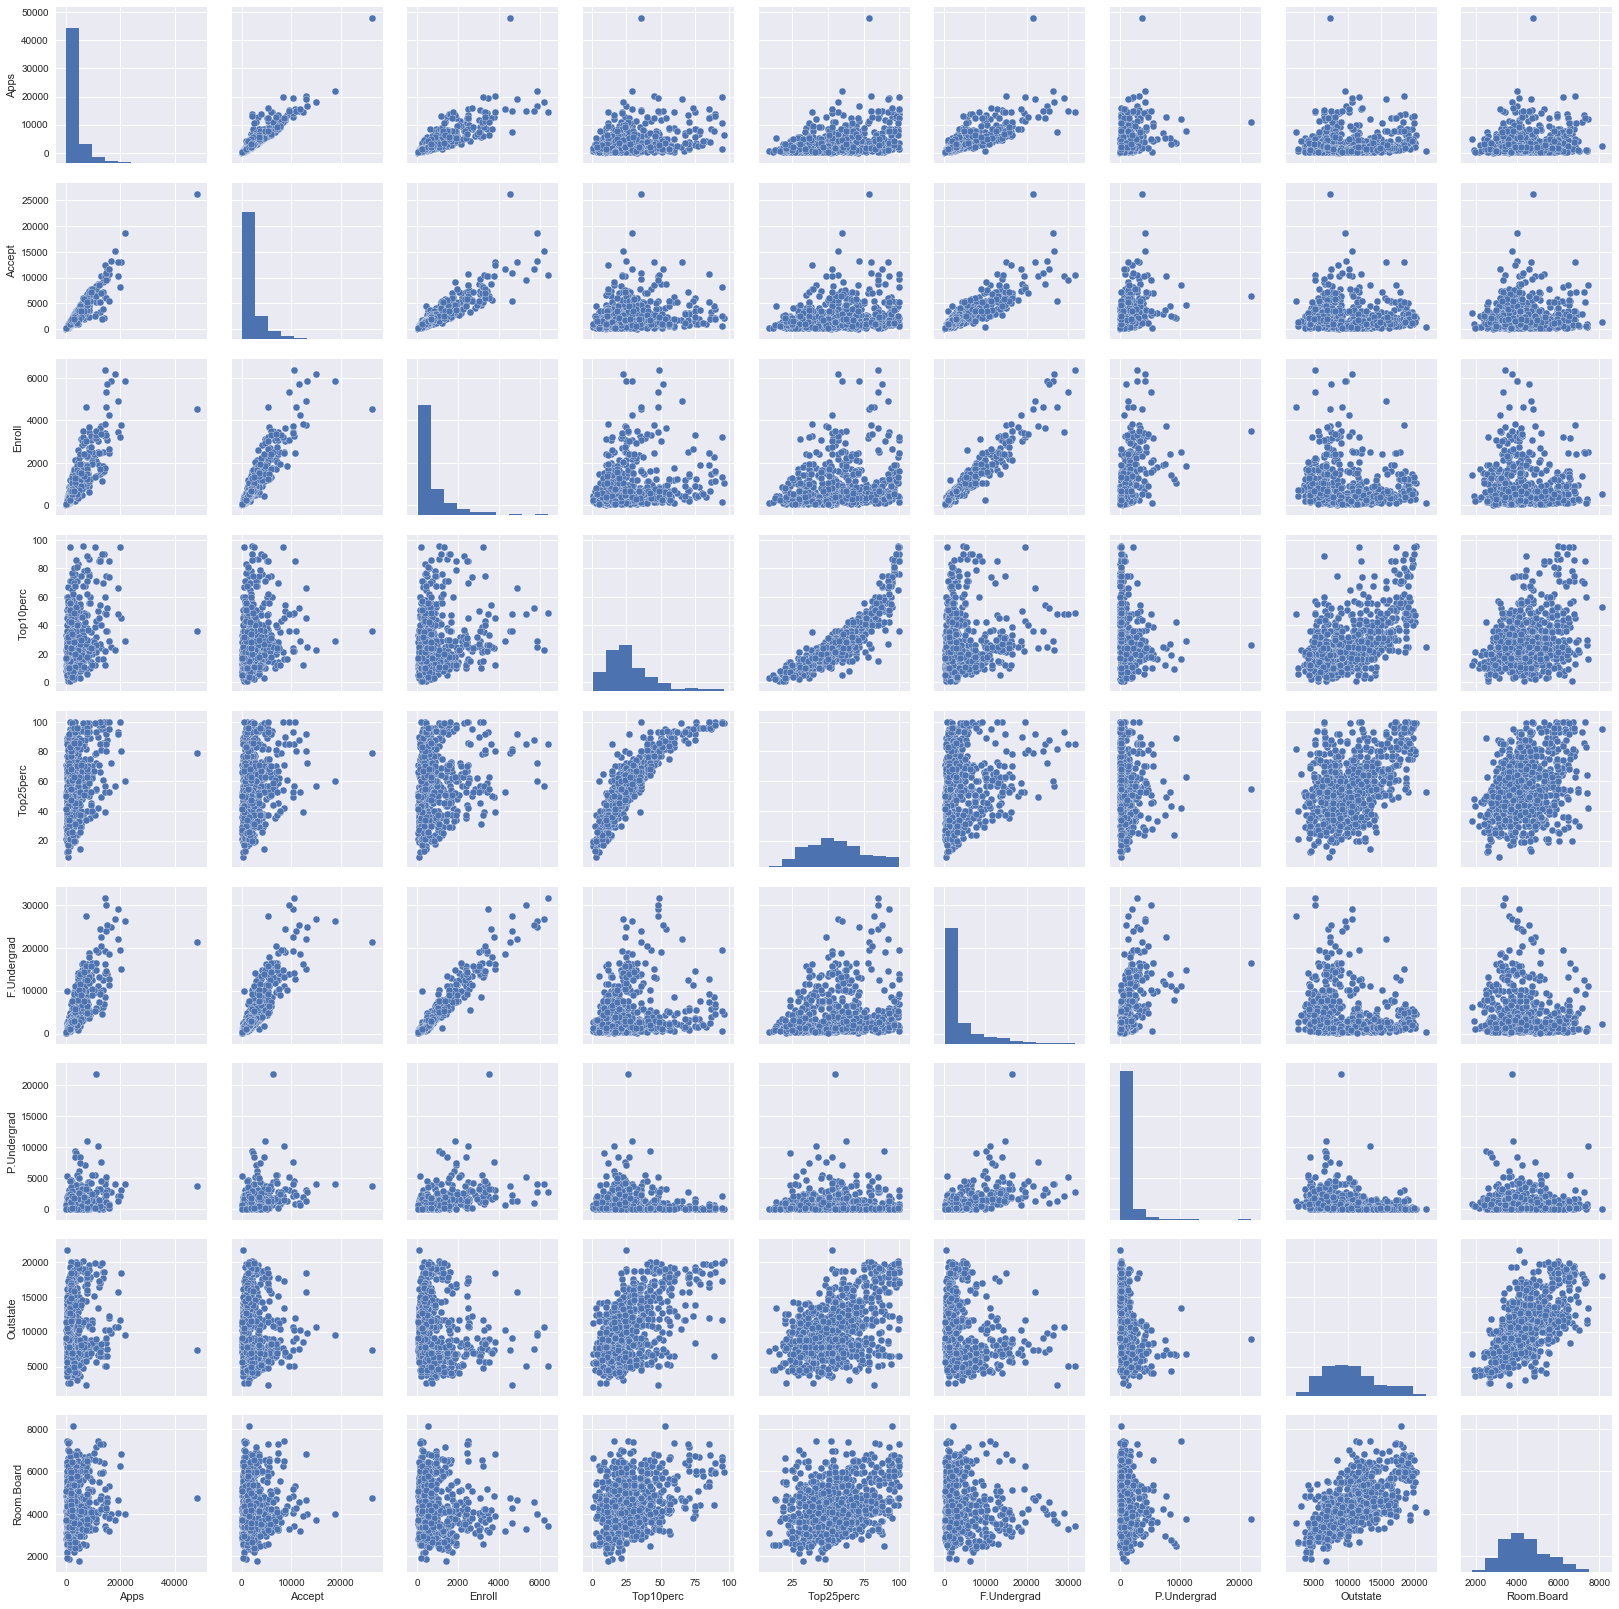

In [8]:
# 8.c.ii  Produce a scatterplot matrix of the first ten columns or variables of the data.
sns.pairplot(df_cities.iloc[:,1:11],)

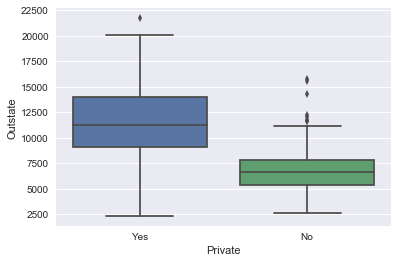

In [9]:
# 8.c.iii Produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(x = df_cities.Private, y = df_cities.Outstate)

In [10]:
# 8.c.iv Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
# We are going to divide universities into two groups based on whether or not the proportion of students 
# coming from the top 10% of their high school classes exceeds 50 %.

df_cities['Elite'] = np.where(df_cities.Top10perc > 50, "Yes", "No")
df_cities.Elite.value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

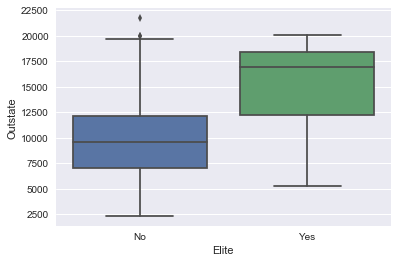

In [11]:
# 8.c.iv Produce side-by-side boxplots of Outstate versus Elite.
sns.boxplot(x=df_cities.Elite, y=df_cities.Outstate)

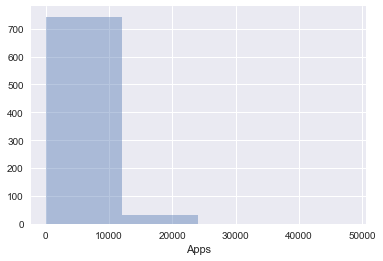

In [12]:
sns.distplot(df_cities.Apps, bins=4, kde=False)

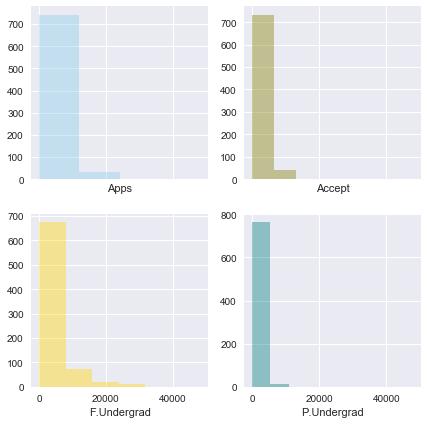

In [13]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df_cities["Apps"] , color="skyblue", ax=axes[0, 0], bins= 4, kde=False)
sns.distplot( df_cities["Accept"] , color="olive", ax=axes[0, 1], bins= 4, kde=False)
sns.distplot( df_cities["F.Undergrad"] , color="gold", ax=axes[1, 0], bins= 4, kde=False)
sns.distplot( df_cities["P.Undergrad"] , color="teal", ax=axes[1, 1], bins= 4, kde=False)

### Question 9 – Auto dataset

In [14]:
df_auto = pd.read_csv(os.path.join(dataset_dir, 'auto.csv'))

In [15]:
# 9.a Which of the predictors are quantitative, and which are qualitative?
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Qualitative**: name, year, origin

**Quantitative**: mpg, cylinders, displacement, horsepower, weight

In [16]:
# 9(b) What is the range of each quantitative predictor? You can an- swer this using the range() function.
# 9(c) What is the mean and standard deviation of each quantitative predictor?
quant = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
qual = ['name',  'origin']
df_quant = df_auto[quant]
df_quant.horsepower = df_quant.horsepower.replace('?', np.NaN)
df_quant = df_quant.astype(float)
pd.DataFrame({'range': df_quant.max() - df_quant.mean(),
             'mean': df_quant.mean(),
             'st_dev':df_quant.std()})

,range,mean,st_dev
mpg,23.08,23.52,7.83
cylinders,2.54,5.46,1.70
displacement,261.47,193.53,104.38
horsepower,125.53,104.47,38.49
weight,2169.74,2970.26,847.90
acceleration,9.24,15.56,2.75


In [17]:
# 9(d) Now remove the 10th through 85th observations. 
# What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

df_quant_subset = df_quant.drop(df_quant.index[10: 85])
pd.DataFrame({'range': df_quant_subset.max() - df_quant_subset.mean(),
             'mean': df_quant_subset.mean(),
             'st_dev':df_quant_subset.std()})

,range,mean,st_dev
mpg,22.19,24.41,7.91
cylinders,2.62,5.38,1.66
displacement,267.32,187.68,100.12
horsepower,128.76,101.24,36.19
weight,2060.19,2936.81,810.99
acceleration,9.10,15.70,2.71


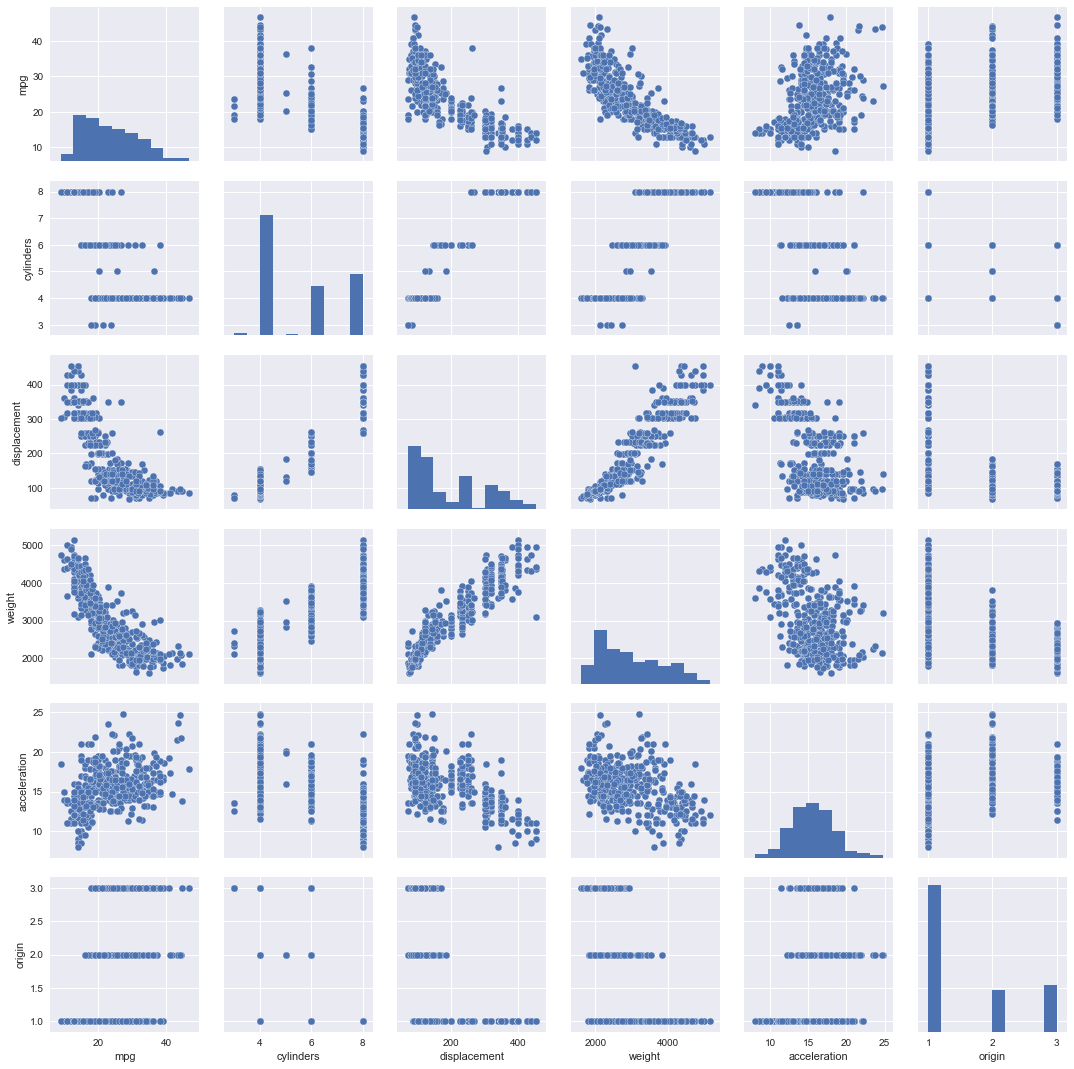

In [18]:
# 9(e) Using the full data set, investigate the predictors graphically, using scatterplots 
#     or other tools of your choice. Create some plots highlighting the relationships among the predictors. 
#     Comment on your findings.
df_auto_c = pd.concat([df_quant[['mpg', 'cylinders', 'displacement', 'weight','acceleration']], 
                       df_auto[qual]], axis = 1)
sns.pairplot(df_auto_c)

**Findings**:<br>
    &emsp;mpg seems to have strong corelation with displacement and weight <br>
    &emsp;displacement has positive corelation with weight <br>
    &emsp;number of cylinder corelate positively with weight and displacement and negatively with acceleration <br>
    &emsp;weight has positive corelation with displacement <br>
    

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. 
Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.
<br><br>
&emsp; Displacement and Weight shows strong corelation. Acceleration is not strongly corelated with mpg hence we might drop it in our analysis 


### Question 10 Boston Housing dataset

In [19]:
df_boston = pd.read_csv(os.path.join(dataset_dir, 'BostonHousing.csv'))

Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [20]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2


In [21]:
#10(a) How many rows are in this data set? How many columns? What do the rows and columns represent?
df_boston.shape

(506, 14)

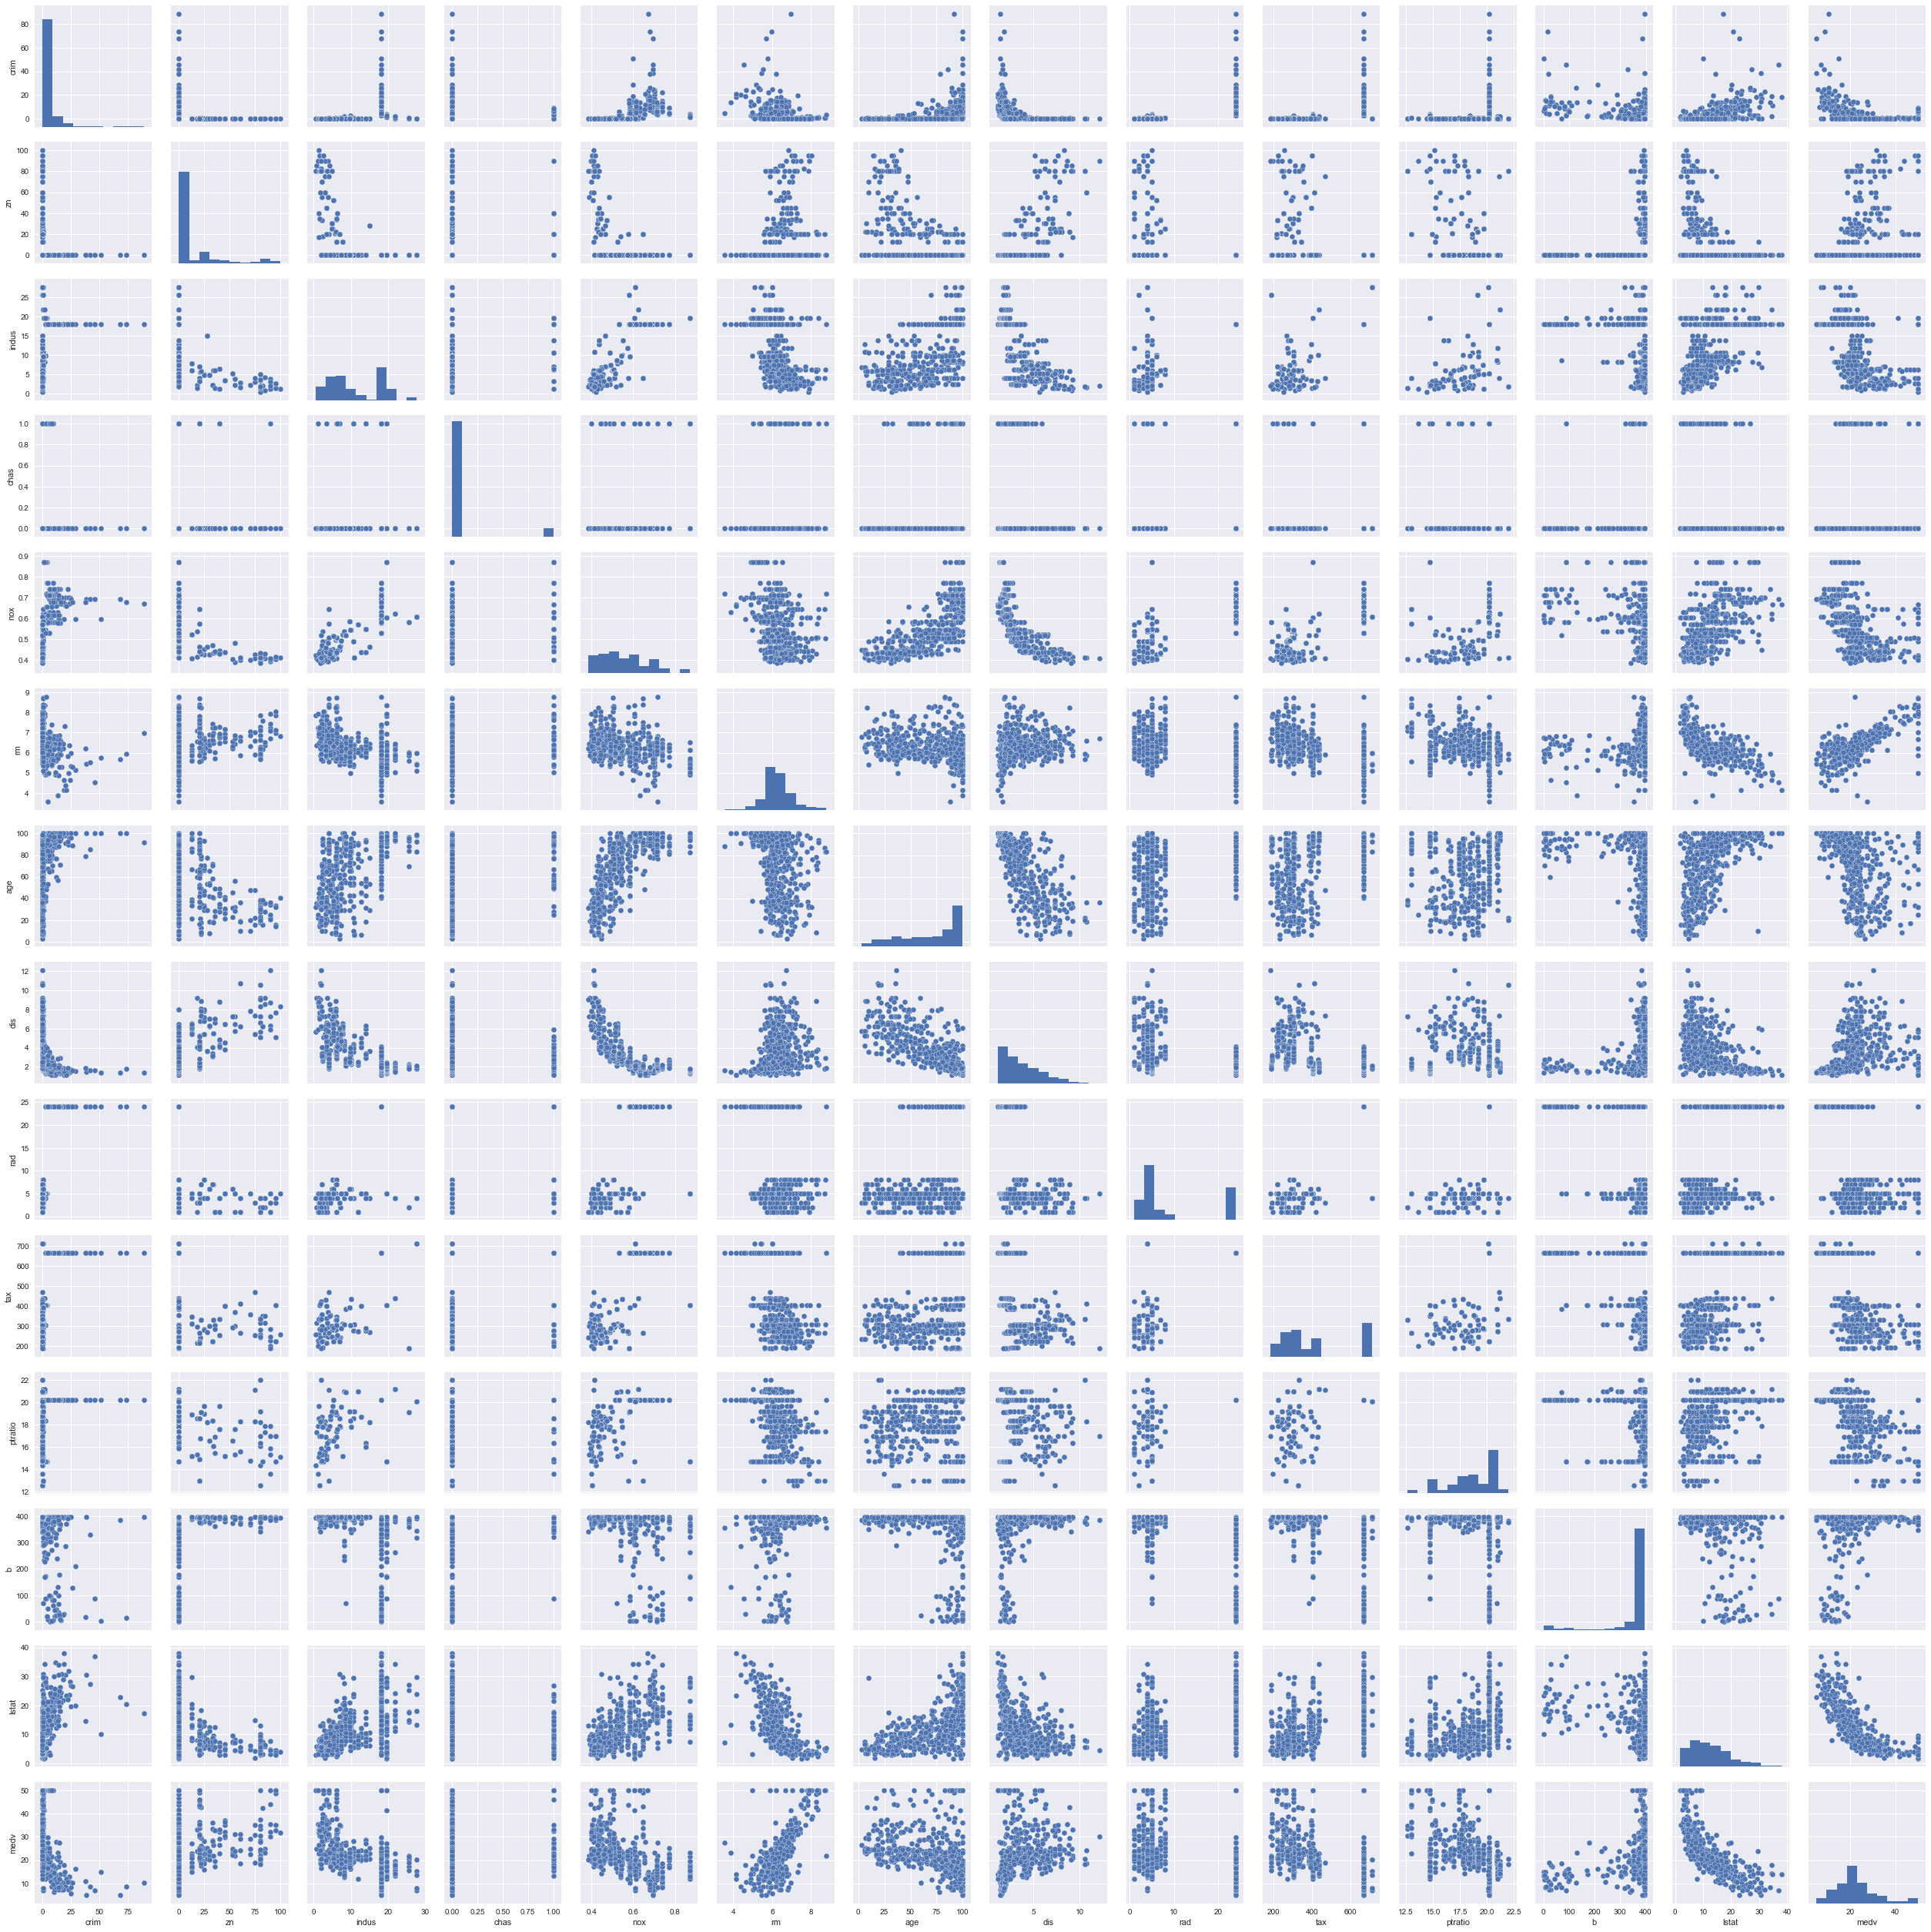

In [22]:
sns.pairplot(df_boston)

Findings: <br>
&emsp;NOS: seems to have corelation with distance_to emp centers <br>
&emsp;RM: has corelation with LSTAT and MDEV
    

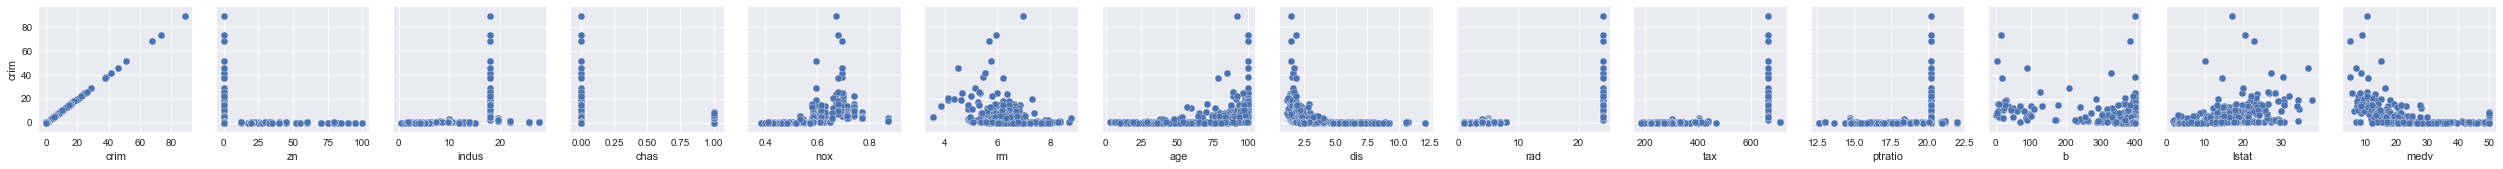

In [23]:
# 10(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
sns.pairplot(data=df_boston, y_vars=['crim'], x_vars=df_boston.columns)

Yes crime seems to increase drastically when number of old properties increases <br>
It seems to be very high in houses near areas of employment 

(d) Do any of the suburbs of Boston appear to have particularly high crime rates? 
Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.<br>

**Suburbs** Crime rate seems to decrease drastically when distance from employment center increases. <br>
**Tax Rates** Crime rates looks grouped at the lower end for low tax rates but spread out across for higher tax rates <br>
**Pupli-teacher ratio** Similar as tax rates

In [24]:
#(e) How many of the suburbs in this data set bound the Charles river?
df_boston[df_boston.chas == 0].shape[0]

471

In [25]:
#(f) What is the median pupil-teacher ratio among the towns in this data set?
df_boston.ptratio.median()

19.05

In [26]:
# (g) Which suburb of Boston has lowest median value of owner- occupied homes? 
# What are the values of the other predictors for that suburb, and how do those values compare to 
# the overall ranges for those predictors? Comment on your findings.
df_boston[df_boston.medv == df_boston.medv.min()]


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.35,0.0,18.1,0,0.69,5.45,100.0,1.49,24,666,20.2,396.90,30.59,5.0
405,67.92,0.0,18.1,0,0.69,5.68,100.0,1.43,24,666,20.2,384.97,22.98,5.0


In [27]:
df_boston.describe().iloc[[3,7]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
min,6.32e-03,0.0,0.46,0.0,0.39,3.56,2.9,1.13,1.0,187.0,12.6,0.32,1.73,5.0
max,8.90e+01,100.0,27.74,1.0,0.87,8.78,100.0,12.13,24.0,711.0,22.0,396.90,37.97,50.0


The values are at extreme ends. <br>
eg: **dis** to employment center is minimum <br>
&emsp; **ptratio** is at the higher end <br>
&emsp; **tax** close to highest

In [28]:
# (h) In this data set, how many of the suburbs average more than seven rooms per dwelling? 
# More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.
print ('>7: ', df_boston[df_boston.rm > 7].shape[0])
print ('>8: ', df_boston[df_boston.rm > 8].shape[0])

>7:  64
>8:  13


In [29]:
df_boston[df_boston.rm > 8].describe().iloc[1]

crim         0.72
zn          13.62
indus        7.08
chas         0.15
nox          0.54
rm           8.35
age         71.54
dis          3.43
rad          7.46
tax        325.08
ptratio     16.36
b          385.21
lstat        4.31
medv        44.20
Name: mean, dtype: float64

These areas having average more than 8 rooms per dwelling must have larger homes <br>
Observations: <br>
&emsp; Crime rate is low <br>
&emsp; Nox is low, so cleaner air <br>
&emsp; Tax is high <br>
&emsp; Have emplpyment centers at reasonable distances <br>
&emsp; Low Indus means more residential population